
# Model Evaluation (scikit-learn)


<h2> Table of contents </h2>

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of data](#Data)
    1. [Spliting the dataframe](#Spliting)
3. [Fuctions definitions](#Fuctions)
    1. [Binary Classification](#Binary)
        1. [Binary Classification Sumary](#BinarySumary)
        2. [precision_recall_curve](#precision_recall_curve)
        3. [roc_curve](#roc_curve)
        4. [class_likelihood_ratios](#class_likelihood_ratios)
        5. [det_curve](#det_curve)
    2. [Multiclass Classification](#Multiclass)
        1. [balanced_accuracy_score](#balanced_accuracy_score)
        2. [cohen_kappa_score](#cohen_kappa_score)
        3. [confusion_matrix](#confusion_matrix)
        4. [hinge_loss](#hinge_loss)
        5. [matthews_corrcoef](#matthews_corrcoef)
        6. [roc_auc_score](#roc_auc_score)
        7. [top_k_accuracy_score](#top_k_accuracy_score)
    3. [Multilabel Classification](#Multiclass)
        1. [accuracy_score](#accuracy_score)
        2. [classification_report](#classification_report)
        3. [f1_score](#f1_score)
        4. [fbeta_score](#fbeta_score)
        5. [hamming_loss](#hamming_loss)
        6. [jaccard_score](#jaccard_score)
        7. [log_loss](#log_loss)
        8. [multilabel_confusion_matrix](#multilabel_confusion_matrix)
        9. [precision_recall_fscore_support](#precision_recall_fscore_support)
        10. [precision_score](#precision_score)
        11. [recall_score](#recall_score)
        12. [roc_auc_score](#roc_auc_score)
        13. [zero_one_loss](#zero_one_loss)
    4. [Clustering](#Clustering)
    5. [Regression](#Regression)
        1. [mean_squared_error](#mean_squared_error)
4. [Modeling](#Modeling)
    1. [Classification](#ClassificationTrained)
        1. [Binary](#BinaryTrained)
        2. [Multiclass](#MulticlassTrained)
        2. [Multilabel](#MultilabelTrained)
    2. [Clustering](#ClusteringTrained)
    3. [Regression](#RegressionTrained)
5. [Results](#Results)
    1. [Binary Classification](#ResultsBinary)
    2. [Multiclass Classification](#ResultsMulticlass)
    3. [Multilabel Classification](#ResultsMultilabel)
    4. [Clustering](#ResultsClustering)
    5. [Regression](#ResultsRegression)

<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>

This is a file with functions that aim to facilitate the performance analysis of models. As output, the functions provide graphs, metrics, and basic tables used in the analysis process. Pay attention to the functions parameters:

- **final_model**: developed model
    > Save as **final_model_*type***

&nbsp;

- **model**: type of developed model:
    - **lgbm**: Light Gradient Boosting Machine;
    - **loglin**: Linear Regression;
    - **logreg**: Logistic Regression;

&nbsp;

- **X**: test or validation database;

&nbsp;

- **y**: test or validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
<section id="Packages">

In [266]:
#!pip install PySimpleGUI

In [399]:
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import reduce_memory_usage, display_all

# graphics ands tables
from scipy import stats
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# interative interface
import ipywidgets as widgets
from IPython.display import display


---



<section id="Data">
   <h2> 2. Import of data </h2>
<section id="Data">


In [272]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [273]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [275]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [277]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0



<section id="Spliting">
    <h3> 2.1. Spliting the dataframe </h3>
</section>


In [285]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(
                                                        df_origin,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


---



<section id="Fuctions">
    <h2> 3. Fuctions definitions </h2>
<section id="Fuctions">
    


<section id="Binary">
    <h3> 3.1. Binary Classification </h3>
<section id="Binary">



- Supervised model
- Decision Trees



<section id="BinarySumary">
    <h4> 3.1.1. Binary Classification Sumary </h4>
<section id="BinarySumary">


In [415]:
def evaluation_BinaryClassification_graphs(model, y, th, X):

    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))

    # EVALUATION - ROC CURVE
  
    # Cálculo da taxa de falsos positivos, verdadeiros positivos e limiares para decisão de classificação para diferentes pontos de corte probabilístico
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    # Métrica ROC AUC em porcentagem
    print('ROC AUC: ', auc(fpr, tpr) * 100)
    # Plotagem da curva ROC
    axes[0,0].plot(fpr, tpr, color='blue', label='ROC')
    # Definição do ponto específico na curva ROC relacionado ao limiar setado (th)
    loc = np.argmin(np.abs(thresholds-th))
    # Plotagem do ponto da curva associado ao limiar setado (th)
    axes[0,0].plot(fpr[loc], tpr[loc], marker='o', color='red')
    # Linha diagonal indicadora de desemprenho aleatório
    axes[0,0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    # Rótulos e títulos
    axes[0,0].set_xlabel('Taxa de Falso Positivo')
    axes[0,0].set_ylabel('Taxa de Verdadeiro Positivo')
    axes[0,0].set_title('Curva ROC')
                      
   # EVALUATION - PRECISION-RECALL CURVE
    
    # Cálculo da taxa de precision, recall e limiares para decisão de classificação para diferentes pontos de corte probabilístico
    precision, recall, thresholds = precision_recall_curve(y, y_pred_proba)
    # AUC da curva de Precision-Recall em porcentagem
    print('PR AUC: ', auc(recall, precision))
    axes[0,1].plot(recall, precision)
    # Definição do ponto específico na curva ROC relacionado ao limiar setado (th)
    loc = np.argmin(np.abs(thresholds-th))
    # Plotagem do ponto da curva associado ao limiar setado (th)
    axes[0,1].plot(recall[loc], precision[loc], 'ko')
    # Rótulos e títulos
    axes[0,1].set_title('Curva de Precisão/Recall')
    axes[0,1].set_xlabel('Recall')
    axes[0,1].set_ylabel('Precisão')
    
   # EVALUATION - CONFUSION MATRIX

    limiar = th

    cm = confusion_matrix(y, (y_pred_proba>=th))
    cm = cm/np.sum(cm)
    print('Confusion matrix: ', cm/np.sum(cm))

    sns.heatmap(cm, vmax=np.max(cm), vmin=np.min(cm), annot=True, square=True, fmt='g', ax = axes[1,0])
    axes[1,0].set_title("Matriz de Confusão (Limiar = {})".format(limiar))
    axes[1,0].set_xlabel("Previsto")
    axes[1,0].set_ylabel("Verdadeiro") 
    
   # EVALUATION - FALSE NEGATIVES E FALSE POSITIVES
    
    list_fn = []
    list_fp = []
    x = []

    for i in np.arange(0,1,0.01):
        cm = confusion_matrix(y, y_pred_proba>=i)
        list_fn.append(cm[1,0]/(cm[1,0] + cm[1,1]))
        list_fp.append(cm[0,1]/ (cm[0,1] + cm[0,0]))
        x.append(i)

    plt.axvline(th, color='k', linestyle=':')
    
    # Rótulos e títulos
    axes[1,1].plot(x, list_fn, label='Falso Negativo')
    axes[1,1].plot(x, list_fp, label='Falso Positivo')
    axes[1,1].set_title('FP/FN vs Limiar de Decisão')
    axes[1,1].legend()
    
    # EVALUATION - SCORE
    
    y_pred = pd.DataFrame(y_pred_proba, index=X.index, columns=['pred'])
    axes[2,0].hist(y_pred.loc[y==0], bins=np.linspace(0,1,30), color='b', alpha=.3, density=True, rwidth=.8)
    axes[2,0].hist(y_pred.loc[y==1], bins=np.linspace(0,1,30), color='r', alpha=.3, density=True, rwidth=.8)
    axes[2,0].axvline(th, color='k', linestyle=':')

   # EVALUATION - LIFT
    
    step = 0.02
        
    aux_lift = pd.DataFrame()
    aux_lift['real'] = y
    aux_lift['predicted'] = y_pred_proba
    aux_lift.sort_values('predicted', ascending=False, inplace=True)
    x_val = np.arange(step,1+step,step)
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    y_v = []
    
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift)))
        data_here = aux_lift.iloc[:num_data,:]
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
        
    axes[2,1].plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axes[2,1].plot(x_val, np.ones(len(x_val)), 'k-')
    axes[2,1].set_xlabel('Proportion of sample')
    axes[2,1].set_ylabel('Lift')
    axes[2,1].set_title('Lift Curve')          
    

In [293]:
def evaluation_BinaryClassification_tables(model, final_model, X, y, data, target=None, prob=None):
    
    print(f'{model} EVALUATION - GINI, KS E ANÁLISES DE EVENTOS:')

    # Cálculo de GINI
    gini = 2*roc_auc_score(data[target], data[prob]) - 1
    # Cálculo de KS
    ks = stats.ks_2samp(data[data[target] == 0][prob], data[data[target] == 1][prob]).statistic
    # Display de GINI e KS
    print('KS : %s, GINI : %s' % (round(ks,2), round(gini,2)))
    
    # Cálculo das métricas por decil
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob].apply('{0:.5%}'.format)
    kstable['max_prob'] = grouped.max()[prob].apply('{0:.5%}'.format)
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    
    # Formação da tabela
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)

    
    print(f'\n {model} EVALUATION - MÉTRICAS POR DECIS:')

    quebras = 10

    scored = pd.DataFrame(zip(y, y_pred_proba),columns=['y','y_pred_proba'])
    scored = scored.sort_values(by='y_pred_proba').reset_index()
    scored.loc[:,'decil'] = pd.cut(scored.index, quebras, labels=range(quebras))
    group = scored.groupby('decil').agg({'y':['sum','count'], 'y_pred_proba': ['min', 'max']})
    group.loc[:,'rel_acc'] = group.y.loc[::-1,'sum'].cumsum()
    group.loc[:,'bons_acc'] = group.y.loc[::-1,'count'].cumsum()
    group.loc[:,'rel_pct'] = group.rel_acc / group.y['sum'].sum() * 100
    group.loc[:,'nrel_pct'] = group.bons_acc / group.y['count'].sum() * 100
    fp = group.bons_acc
    tn = group.y['count'].sum() - group.y['count']
    group.loc[:,'ifp'] = (fp / (fp + tn)) * 100
    recall = group.y['sum'] / group.y['sum'].sum()
    precision = group.y['sum'] / (group.y['sum'] + group.y['count'])
    group.loc[:,'recall'] = recall
    group.loc[:,'precision'] = precision
    group.loc[:,'f1_score'] = 2 * (precision*recall / (precision + recall))
    group['y_pred_proba'] = group['y_pred_proba'].round(4)

          
    # Display da tabela
    return kstable, group


<section id="precision_recall_curve">
    <h4> 3.1.2. precision_recall_curve </h4>
<section id="precision_recall_curve">



- Definition:
- Note:


In [298]:
def evaluation_BinaryClassification_PrecisionRecall(model, y, th):
            
    print(f'{model} EVALUATION - PRECISION-RECALL CURVE:')
    
    # Cálculo da taxa de precision, recall e limiares para decisão de classificação para diferentes pontos de corte probabilístico
    precision, recall, thresholds = precision_recall_curve(y, y_pred_proba)
    # AUC da curva de Precision-Recall em porcentagem
    print('PR AUC: ', auc(recall, precision))
    plt.plot(recall, precision)
    # Definição do ponto específico na curva ROC relacionado ao limiar setado (th)
    loc = np.argmin(np.abs(thresholds-th))
    # Plotagem do ponto da curva associado ao limiar setado (th)
    plt.plot(recall[loc], precision[loc], 'ko')

    plt.title('Precisão/Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')


<section id="roc_curve">
    <h4> 3.1.3. roc_curve </h4>
<section id="roc_curve">



- Definition: 
- Note:


In [302]:
def evaluation_BinaryClassification_roc(model, y, th):

    print(f'{model} EVALUATION - ROC CURVE:')
  
    # Cálculo da taxa de falsos positivos, verdadeiros positivos e limiares para decisão de classificação para diferentes pontos de corte probabilístico
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    # Métrica ROC AUC em porcentagem
    print('ROC AUC: ', auc(fpr, tpr) * 100)
    # Plotagem da curva ROC
    plt.plot(fpr, tpr, color='blue', label='ROC')
    # Definição do ponto específico na curva ROC relacionado ao limiar setado (th)
    loc = np.argmin(np.abs(thresholds-th))
    # Plotagem do ponto da curva associado ao limiar setado (th)
    plt.plot(fpr[loc], tpr[loc], marker='o', color='red')
    # Linha diagonal indicadora de desemprenho aleatório
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    # Rótulos e títulos
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    


<section id="class_likelihood_ratios">
    <h4> 3.1.5. class_likelihood_ratios </h4>
<section id="class_likelihood_ratios"> 



- Definition: 
- Note: 


In [306]:
# class LikelihoodRatios:
#     def __init__(self, model):
#         self.model = model

#     def calculate_likelihood_ratios(self, X):
#         # Obtém as probabilidades de pertencer à classe positiva e à classe negativa
#         probabilities = self.model.predict_proba(X)
#         positive_probabilities = probabilities[:, 1]
#         negative_probabilities = probabilities[:, 0]
        
#         # Calcula os likelihood ratios
#         likelihood_ratios = positive_probabilities / negative_probabilities
#         return likelihood_ratios

    
# # Calcula os likelihood ratios para o conjunto de teste usando o modelo treinado
# lr_calculator = LikelihoodRatios(model)
# likelihood_ratios = lr_calculator.calculate_likelihood_ratios(X_test)

# # Exibe os likelihood ratios calculados
# print('Likelihood Ratios para o conjunto de teste:')
# print(likelihood_ratios)

In [308]:
#code


<section id="det_curve">
    <h4> 3.1.6. det_curve </h4>
<section id="det_curve"> 


**recall (recall_score)**:

- Definition: 
- Note: 

In [312]:
def evaluation_BinaryClassification_DetCurve(y_train, y, title='DET Curve', xlabel='False Positive Rate (%)', ylabel='False Negative Rate (%)'):

    fpr, fnr, _ = confusion_matrix(y_true, (y_score >= 0.5)).ravel()

    fpr = 100 * fpr / (fpr + fnr)
    fnr = 100 * fnr / (fpr + fnr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, fnr, marker='o', linestyle='-', color='b')
    plt.plot([0, 100], [0, 100], linestyle='--', color='gray')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# evaluation_BinaryClassification_DetCurve(y_train, y_pred_validation)


<section id="Multiclass ">
    <h3> 3.2. Multiclass Classification </h3>
<section id="Multiclass">



- Supervised model
- Decision Trees



<section id="balanced_accuracy_score">
    <h4> 3.2.1. balanced_accuracy_score </h4>
<section id="balanced_accuracy_score">



- Definition:
- Note:



<section id="cohen_kappa_score">
    <h4> 3.2.2. cohen_kappa_score </h4>
<section id="cohen_kappa_score">



- Definition:
- Note:



<section id="confusion_matrix">
    <h4> 3.2.3. confusion_matrix </h4>
<section id="confusion_matrix">



- Definition:
- Note:


In [322]:
def evaluation_MulticlassClassification_ConfusionMatrix(model, y, th):
    
    print(f'{model} EVALUATION - CONFUSION MATRIX:')

    threshold = th

    cm = confusion_matrix(y, (y_pred_proba>=th))
    cm = cm/np.sum(cm)
    print(cm/np.sum(cm))

    sns.heatmap(cm, vmax=np.max(cm), vmin=np.min(cm), annot=True, square=True, fmt='g')
    plt.title('Confusion Matrix (Threshold = {})'.format(threshold))
    plt.xlabel('Predicted')
    plt.ylabel('True')


<section id="hinge_loss">
    <h4> 3.2.4. hinge_loss </h4>
<section id="hinge_loss">



- Definition:
- Note:



<section id="matthews_corrcoef">
    <h4> 3.2.5. matthews_corrcoef </h4>
<section id="matthews_corrcoef">



- Definition:
- Note:



<section id="roc_auc_score">
    <h4> 3.2.6. roc_auc_score </h4>
<section id="roc_auc_score">



- Definition:
- Note:



<section id="top_k_accuracy_score">
    <h4> 3.2.7. top_k_accuracy_score </h4>
<section id="top_k_accuracy_score">



- Definition:
- Note:



<section id="Multilabel ">
    <h3> 3.3. Multilabel  Classification  </h3>
<section id="Multilabel "> 



- Supervised model
- Decision Trees



<section id="accuracy_score">
    <h4> 3.3.1. accuracy_score </h4>
<section id="accuracy_score">



- Definition:
- Note:



<section id="classification_report">
    <h4> 3.3.2. classification_report </h4>
<section id="classification_report">



- Definition:
- Note:



<section id="f1_score">
    <h4> 3.3.3. f1_score </h4>
<section id="f1_score">



- Definition:
- Note:



<section id="fbeta_score">
    <h4> 3.3.4. fbeta_score </h4>
<section id="fbeta_score">



- Definition:
- Note:



<section id="hamming_loss">
    <h4> 3.3.5. hamming_loss </h4>
<section id="hamming_loss">



- Definition:
- Note:



<section id="jaccard_score">
    <h4> 3.3.6. jaccard_score </h4>
<section id="jaccard_score">



- Definition:
- Note:



<section id="log_loss">
    <h4> 3.3.7. log_loss </h4>
<section id="log_loss">



- Definition:
- Note:



<section id="multilabel_confusion_matrix">
    <h4> 3.3.8. multilabel_confusion_matrix </h4>
<section id="multilabel_confusion_matrix">



- Definition:
- Note:



<section id="precision_recall_fscore_support">
    <h4> 3.3.9. precision_recall_fscore_support </h4>
<section id="precision_recall_fscore_support">



- Definition:
- Note:



<section id="precision_score">
    <h4> 3.3.10. precision_score </h4>
<section id="precision_score">



- Definition:
- Note:



<section id="recall_score">
    <h4> 3.3.11. recall_score </h4>
<section id="recall_score">



- Definition:
- Note:



<section id="roc_auc_score">
    <h4> 3.3.12. roc_auc_score </h4>
<section id="roc_auc_score">



- Definition:
- Note:



<section id="zero_one_loss">
    <h4> 3.3.13. zero_one_loss </h4>
<section id="zero_one_loss">



- Definition:
- Note:



<section id="Clustering">
    <h3> 3.4. Clustering </h3>
<section id="Clustering"> 



<section id="Regression">
    <h3> 3.5. Regression </h3>
<section id="Regression"> 


- Supervised model
- Decision Trees


<section id="mean_squared_error">
    <h4> 3.5.1. mean_squared_error </h4>
<section id="mean_squared_error">



- Definition:
- Note:


In [365]:
def evaluation_regression_mse(model, y_pred_test, y_validation, y_pred_validation):
    print(f'{model} EVALUATION - REGRESSION - MSE:')
    
    print('TEST PERFORMANCE:')
    mse_test = mean_squared_error(y_test, y_pred_test)
    print('TEST MSE: , ', mse_test)
    
    print('VALIDATION PERFORMANCE:')
    mse_validation = mean_squared_error(y_validation, y_pred_validation)
    print('VALIDATION MSE: , ', mse_validation)
    
    


---



<section id="Modeling">
    <h2> 5. Modeling </h2>
<section id="Modeling"> 
    


<section id="ModelingModeling">
    <h3> 5.1. Classification </h3>
<section id="ModelingModeling"> 
    


<section id="BinaryModeling">
    <h4> 5.1. Binary </h4>
<section id="BinaryModeling"> 
    

In [371]:
# Definition of parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creation of the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Grid search configuration with cross-validation
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtaining the best parameters found through grid search
best_params = grid_search.best_params_
print('Best params: ', best_params)

# Creation of a new model using the best parameters found
final_model_rf = RandomForestClassifier(random_state=42, **best_params)

# Training the model with the training data
final_model_rf.fit(X_train, y_train)

# Predictions on the test set
predictions = final_model_rf.predict(X_test)

# Saving the trained model to a file
joblib.dump(final_model_rf, 'final_model_rf.pkl')

Best params:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


['final_model_rf.pkl']


<section id="BinaryModeling">
    <h4> 5.1. Multiclass </h4>
<section id="MulticlassModeling"> 
    


<section id="MultilabelModeling">
    <h4> 5.1. Multilabel </h4>
<section id="MultilabelModeling"> 
    


<section id="ClusteringModeling">
    <h3> 5.1. Clustering </h3>
<section id="ClusteringModeling"> 
    


<section id="RegressionModeling">
    <h3> 5.1. Regression </h3>
<section id="RegressionModeling"> 
    


## 5. Results



<section id="ResultsBinary">
    <h3> 5.1. Binary Classification </h3>
<section id="ResultsBinary">


In [387]:
y_pred_proba = pd.DataFrame(y_validation)

ROC AUC:  100.0
PR AUC:  1.0
Confusion matrix:  [[0.35087719 0.        ]
 [0.64912281 0.        ]]


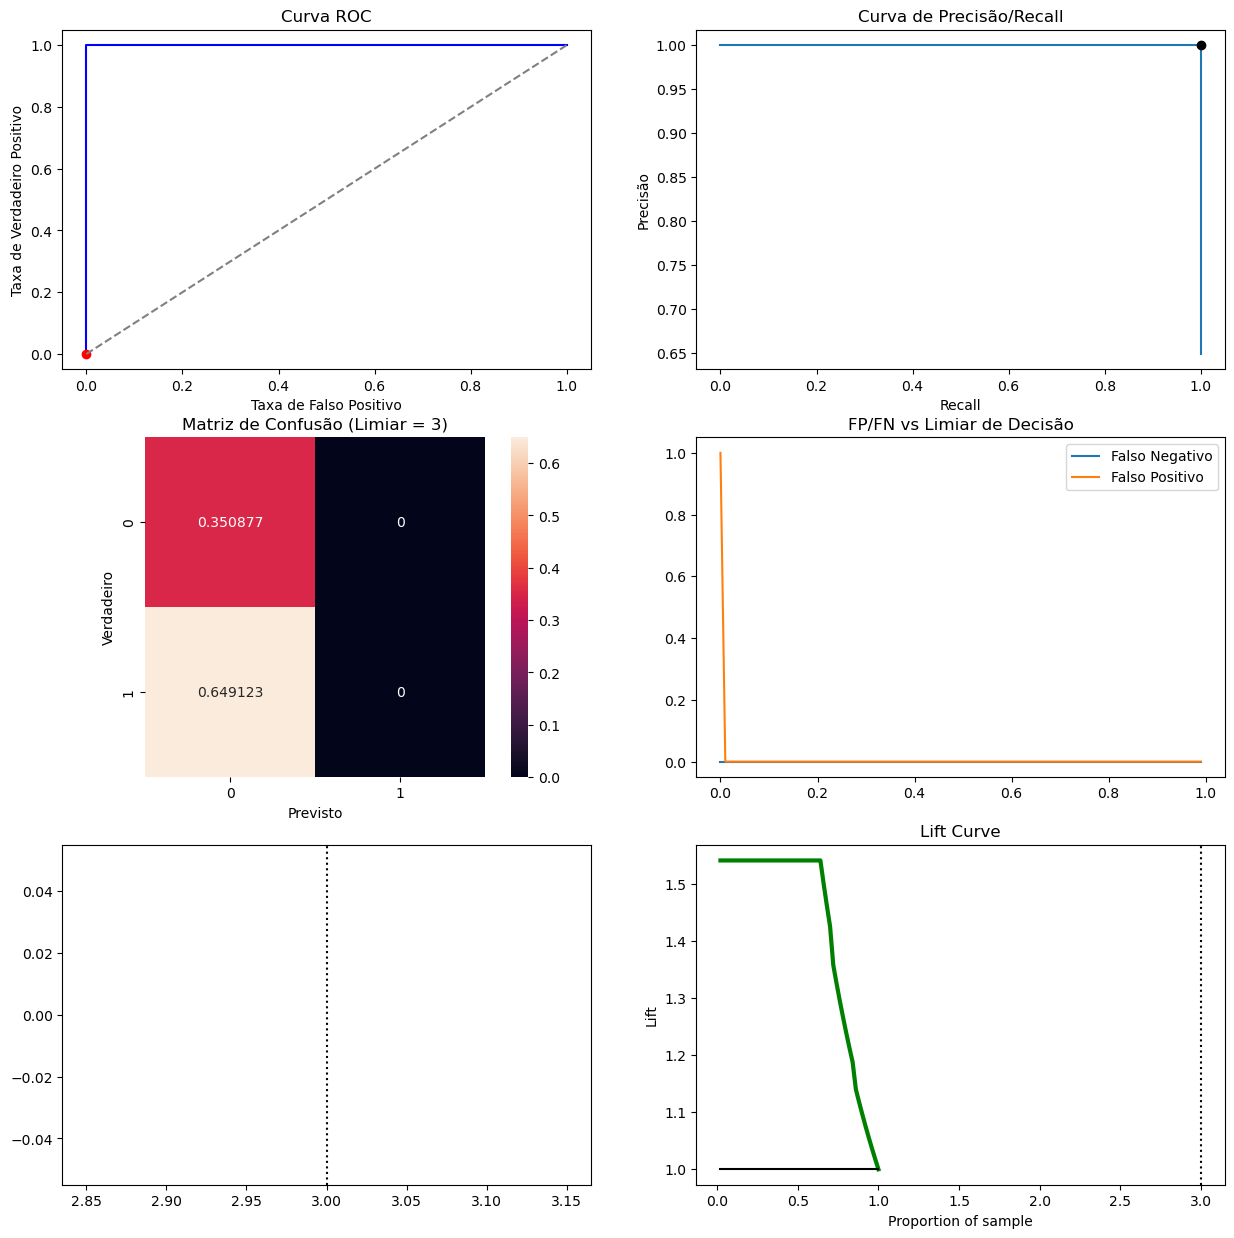

In [417]:
evaluation_BinaryClassification_graphs('rf', y_validation, 3, X_validation)

In [409]:
evaluation_BinaryClassification_tables('rf', final_model_rf, X_validation, y_validation, data, target=None, prob=None)

NameError: name 'data' is not defined


<section id="ResultsMulticlass">
    <h3> 5.2. Multiclass Classification </h3>
<section id="ResultsMulticlass">



<section id="ResultsMultilabel">
    <h3> 5.3. Multilabel Classification </h3>
<section id="ResultsMultilabel">



<section id="ResultsClustering">
    <h3> 5.4. Clustering </h3>
<section id="ResultsClustering">



<section id="ResultsRegression">
    <h3> 5.5. Regression </h3>
<section id="ResultsRegression">
